In [11]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df_random = pd.read_csv("data/testrun_visibilityReward_seed4.csv")
df_MultG2 = pd.read_csv("data/testrun_visibilityReward_seed4_std5_number_gaussians2.csv")
df_MultG6 = pd.read_csv("data/testrun_visibilityReward_seed4_std5_number_gaussians6.csv")
df_noisy = pd.read_csv("data/testrun_visibilityReward_prop_random5_seed4_std5_std_curiosity0.1.csv")
pd.set_option('display.max_columns', None)
# df.head()

datasets = {
    'Random': df_random,
    'MultG2': df_MultG2,
    'MultG6': df_MultG6,
    'Noisy2': df_noisy
}

In [12]:
def plot_smt(name, datasets_dict):
    """
    datasets_dict: dictionary with {label: dataframe} pairs
    """
    curiosities = sorted(list(set().union(*[df["initial_curiosity"].unique() for df in datasets_dict.values()])))
    
    for label, df in datasets_dict.items():
        avg_values = [df[df["initial_curiosity"]==c][name].mean() for c in curiosities]
        std_values = [df[df["initial_curiosity"]==c][name].std() for c in curiosities]
        plt.errorbar(curiosities, avg_values, yerr=std_values, fmt='-o', label=label)
    
    plt.xlabel("Initial Curiosity")
    plt.ylabel(name)
    plt.title(f"{name} vs Initial Curiosity")
    plt.legend()
    plt.grid()
    plt.show()

### Key performance parameter: Share of explored knowledge

These plots show the share of knowledge harvested (first plot) and explore the relative speed of harvesting (second and third plot).

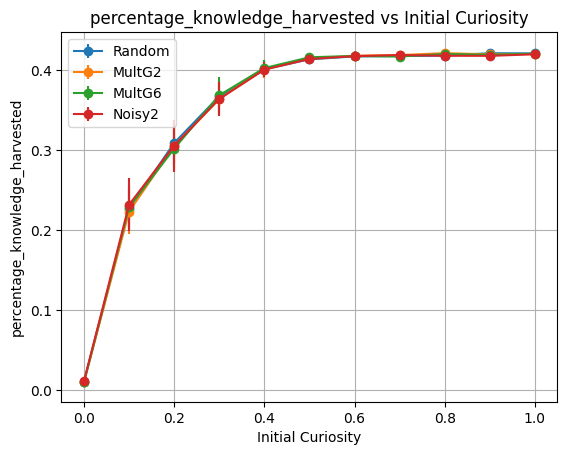

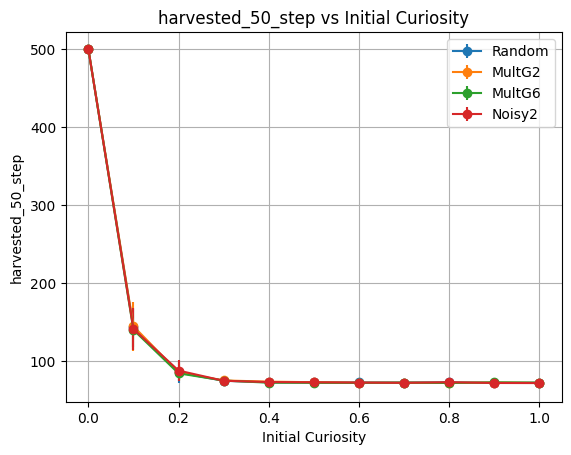

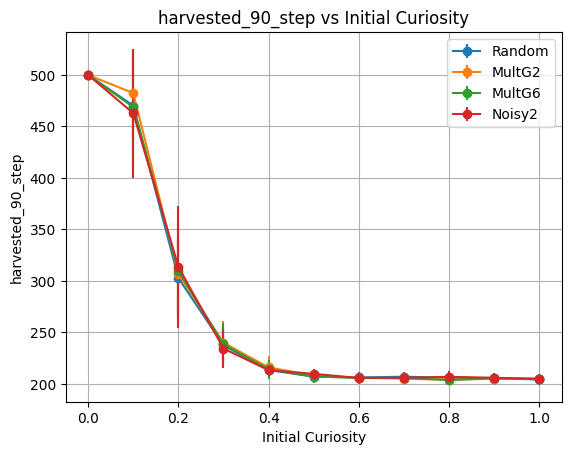

In [13]:
plot_smt("percentage_knowledge_harvested", datasets)
plot_smt("harvested_50_step", datasets)
plot_smt("harvested_90_step", datasets)

### Descriptive parameters

For now this includes top shares of prestige to understand the accumulation of (perceived) scientific merit.

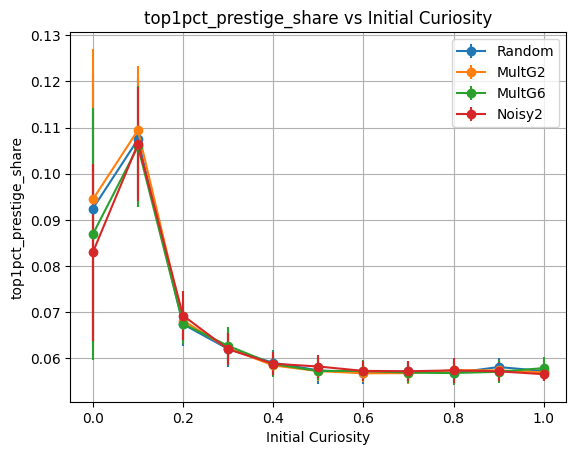

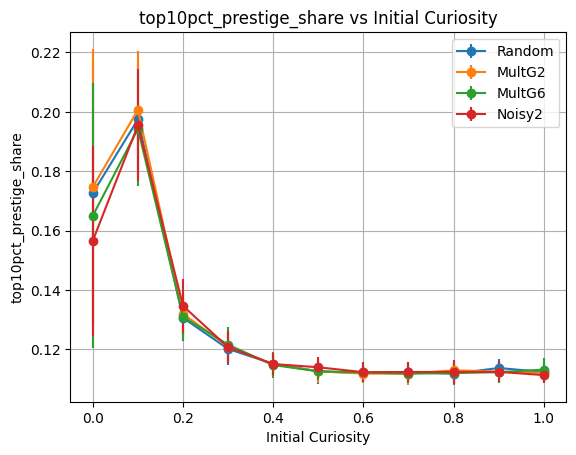

In [14]:
plot_smt("top1pct_prestige_share", datasets)
plot_smt("top10pct_prestige_share", datasets)

### Secondary performance parameter: Share of tiles touched (+ weighted version)

These plots show the share of (weighted vs. unweighted) tiles touched (first plot) and explore the relative speed of harvesting (second and third plot).

In [ ]:
plot_smt("explored_percentage", datasets)
plot_smt("explored_weighted_by_initial_knowledge", datasets)
plot_smt("explored_50_step", datasets)
plot_smt("explored_90_step", datasets)
plot_smt("weighted_50_step", datasets)
plot_smt("weighted_90_step", datasets)

NameError: name 'plot_smt' is not defined

### Additional Parameters

Finally this section includes two plots showing average agent knowledge and remaining knowledge, which for now rather serve as a sanity check.

In [ ]:
plot_smt("avgcurrentAgentKnowledge", datasets)
plot_smt("avg_knowledge_on_grid", datasets)

In [6]:
df_noisy.keys()

Index(['Step', 'agent_generation', 'avg_distance_between_agents',
       'avg_knowledge_on_grid', 'avgcurrentAgentKnowledge', 'best_knowledge',
       'constant_population', 'epsilon', 'explored_50_step',
       'explored_90_step', 'explored_percentage',
       'explored_weighted_by_initial_knowledge', 'generation_params',
       'harvest', 'harvested_50_step', 'harvested_90_step',
       'initial_curiosity', 'mean_age', 'mean_prestige',
       'mean_vanishing_prestige', 'mean_visibility_prestige', 'number_agents',
       'number_connection', 'percentage_knowledge_harvested', 'size',
       'step_limit', 'steps', 'top10pct_prestige_share',
       'top1pct_prestige_share', 'totalInitialKnowledge',
       'total_initial_knowledge', 'vanishing_factor_for_prestige',
       'weighted_50_step', 'weighted_90_step'],
      dtype='object')